In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as st
import seaborn as sb
sb.set()

import import_ipynb
import metadata_options

importing Jupyter notebook from metadata_options.ipynb


### For main dataset 

In [2]:
df = pd.read_csv('./data/kokil dec 6 reprepare/conf_pc_worker_sem.csv')
df = df.dropna()

TP1: weighted by 1 average per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
WT1: weighted by 1 average per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC1: weighted by 1 average per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
TL1: weighted by 1 normalised number of characters per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
SP1: weighted by average of TP1 and TP2 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


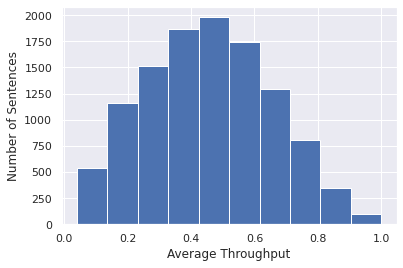

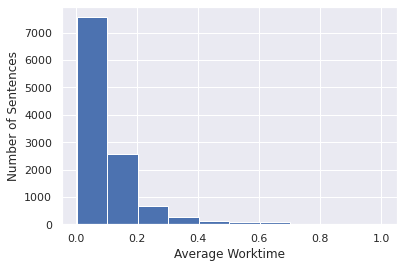

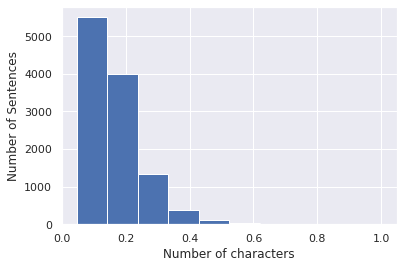

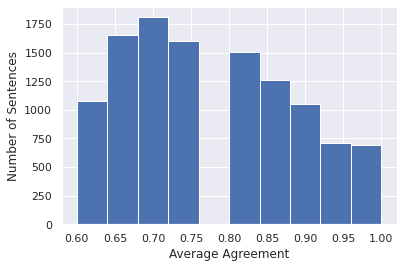

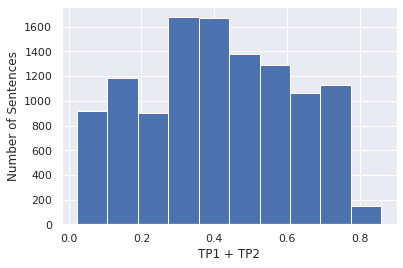

In [3]:
throughput_option = 'TP1'
worktime_option = 'WT1'
pc_agreement_option = 'PC1'
textlength_option = 'TL1'
special_option = 'SP1'
k_option_for_tp = 1
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput_avg, df_worktime_avg, df_agreement_avg, df_textlength_avg, df_special_1 = metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput_avg['avg_throughput'].hist()
plt.xlabel('Average Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_throughput_avg.png')

plt.figure()
hist = df_worktime_avg['avg_worktime'].hist()
plt.xlabel('Average Worktime')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_worktime_avg.png')

plt.figure()
hist = df_textlength_avg['Input.num_characters'].hist()
plt.xlabel('Number of characters')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_textlength_numchars.png')

plt.figure()
hist = df_agreement_avg['avg_agreement'].hist()
plt.xlabel('Average Agreement')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_agreement_avg.png')

plt.figure()
hist = df_special_1['average_avg_var'].hist()
plt.xlabel('TP1 + TP2')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_special_1.png')

In [4]:
df_throughput_avg.head(2)

,Throughput.1,Throughput.2,Throughput.3,Throughput.4,Throughput.5,avg_throughput
0,390,2331,193,2139,162.0,0.373996
1,234,2134,2331,1022,1411.0,0.511474


TP2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
SP2: weighted by average of WT1 and WT2 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


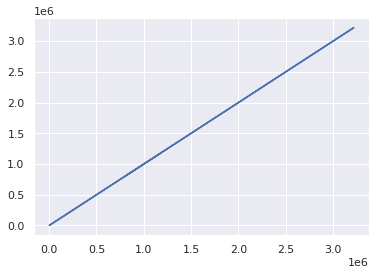

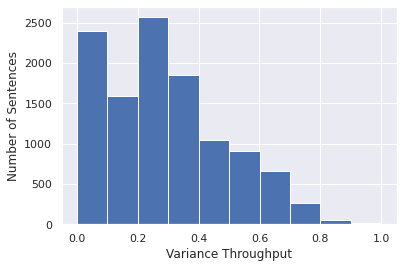

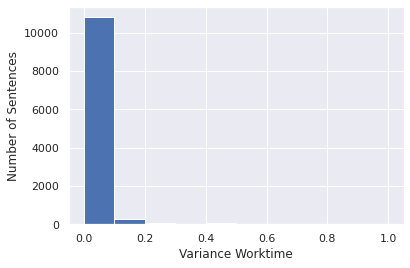

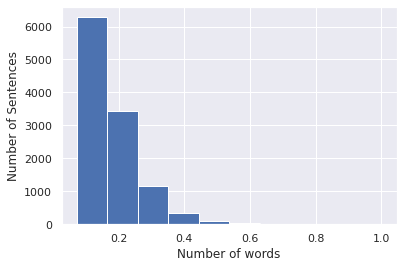

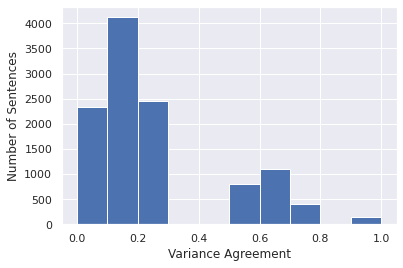

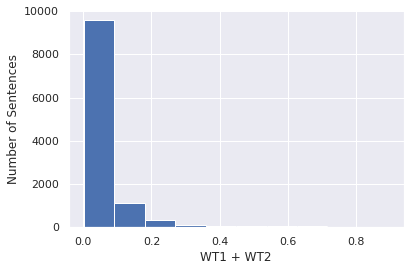

In [5]:
throughput_option = 'TP2'
worktime_option = 'WT2'
pc_agreement_option = 'PC2'
textlength_option = 'TL2'
special_option = 'SP2'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput_var, df_worktime_var, df_agreement_var, df_textlength_var, df_special_var = metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput_var['var_throughput'].hist()
plt.xlabel('Variance Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_throughput_var.png')

plt.figure()
hist = df_worktime_var['var_worktime'].hist()
plt.xlabel('Variance Worktime')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_worktime_var.png')

plt.figure()
hist = df_textlength_var['Input.num_words'].hist()
plt.xlabel('Number of words')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_textlength_words.png')

plt.figure()
hist = df_agreement_var['var_agreement'].hist()
plt.xlabel('Variance Agreement')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_agreement_var.png')

plt.figure()
hist = df_special_var['average_avg_var'].hist()
plt.xlabel('WT1 + WT2')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_special_2.png')

TP3 + k: weighted by 1 inverted k-power U-shaped variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC3: weighted by 1 PC agreement weight per annotation in each OHE, i.e. (a, b, c, d) -> (w1*a, w2*b, w3*c, w4*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
SP3: weighted by average of PC1 and PC2 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


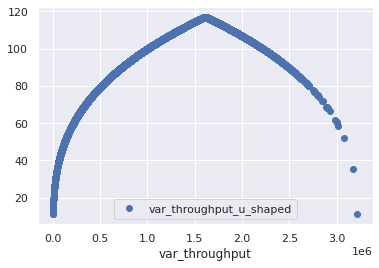

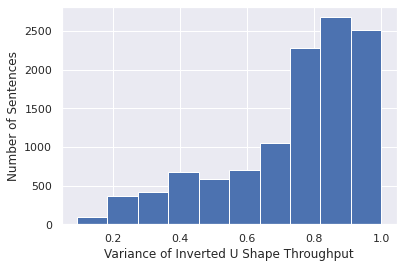

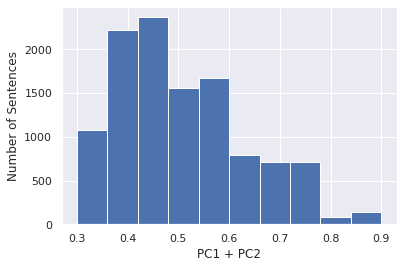

In [6]:
throughput_option = 'TP3'
worktime_option = 'WT2'
pc_agreement_option = 'PC3'
textlength_option = 'TL2'
special_option = 'SP3'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput_inv_u, _, df_agreement_per_option, _, df_special_4 = metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput_inv_u['var_throughput_u_shaped'].hist()
plt.xlabel('Variance of Inverted U Shape Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_throughput_u_var.png')

plt.figure()
hist = df_special_4['average_avg_var'].hist()
plt.xlabel('PC1 + PC2')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_special_3.png')

TP4 + k: weighted by 1 upright k-power U-shaped variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC3: weighted by 1 PC agreement weight per annotation in each OHE, i.e. (a, b, c, d) -> (w1*a, w2*b, w3*c, w4*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
# RAND_NORM: weighted by 1 normally distributed random number between 0 to 1 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


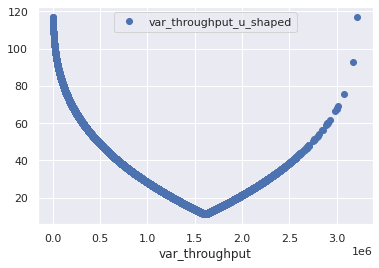

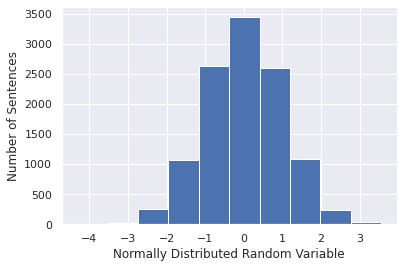

In [7]:
throughput_option = 'TP4'
worktime_option = 'WT2'
pc_agreement_option = 'PC3'
textlength_option = 'TL2'
special_option = 'RAND_NORM'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

_, _, _, _, df_special_norm = metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_special_norm['special_norm'].hist()
plt.xlabel('Normally Distributed Random Variable')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_special_5.png')

TP4 + k: weighted by 1 upright k-power U-shaped variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC3: weighted by 1 PC agreement weight per annotation in each OHE, i.e. (a, b, c, d) -> (w1*a, w2*b, w3*c, w4*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
RAND_UNI: weighted by 1 uniformly distributed random number between 0 to 1 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


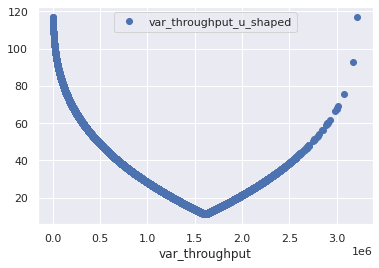

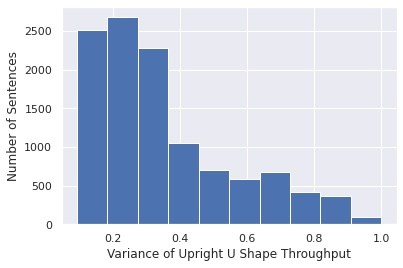

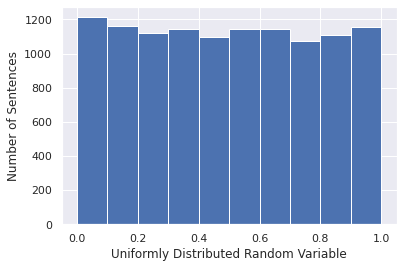

In [8]:
throughput_option = 'TP4'
worktime_option = 'WT2'
pc_agreement_option = 'PC3'
textlength_option = 'TL2'
special_option = 'RAND_UNI'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput_upright_u, _, _, _, df_special_uni = metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput_upright_u['var_throughput_u_shaped'].hist()
plt.xlabel('Variance of Upright U Shape Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_throughput_u_var.png')

plt.figure()
hist = df_special_uni['special_uni'].hist()
plt.xlabel('Uniformly Distributed Random Variable')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_special_4.png')

### Correlation Plots

In [9]:
df_merge = pd.merge(df, df_throughput_avg['avg_throughput'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_worktime_avg['avg_worktime'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_textlength_avg['Input.num_characters'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_special_1['average_avg_var'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_agreement_avg['avg_agreement'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_worktime_var['var_worktime'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_textlength_var['Input.num_words'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_agreement_var['var_agreement'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_special_var['average_avg_var'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_throughput_inv_u['var_throughput_u_shaped'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_special_4['average_avg_var'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_throughput_upright_u['var_throughput_u_shaped'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_special_uni['special_uni'], left_index=True, right_index=True)

In [10]:
df_merge.head()

,Unnamed: 0,Input.sentence_id,HITId,Input.convo_id,Input.train_test_val,Input.msg_id,Input.timestamp,Input.full_text,Input.speaker,Input.reply_to,...,average_avg_var_x,avg_agreement,var_worktime,Input.num_words_y,var_agreement,average_avg_var_y,var_throughput_u_shaped_x,average_avg_var,var_throughput_u_shaped_y,special_uni
0,5,11,3MG8450X2OASXZ0WO9O5AH70GU3UPA,Game1-italy-germany,Train,Game1-italy-germany-3,87,It seems like there are a lot of ways that cou...,germany-Game1,Game1-italy-germany-2,...,0.383479,0.90,0.005924,0.322917,0.2500,0.051859,0.905919,0.57500,0.187945,0.114420
1,6,12,38G0E1M85M552JXSALX4G9WI2I6UVX,Game1-italy-germany,Train,Game1-italy-germany-7,117,"Sorry Italy I've been away doing, um, German t...",germany-Game1,Game1-italy-germany-6,...,0.414510,0.80,0.002734,0.093750,0.5000,0.027211,0.767038,0.65000,0.326826,0.564223
2,7,14,3HYV4299H0WQ2B4TCS7PKDQ75WHE81,Game1-italy-germany,Train,Game1-italy-germany-8,119,"I don't think I'm ready to go for that idea, h...",germany-Game1,Game1-italy-germany-7,...,0.446742,0.65,0.042202,0.197917,0.1875,0.094705,0.782763,0.41875,0.311101,0.179585
3,8,15,3XU9MCX6VOC4P079IHIO9TCNYLGR2P,Game1-italy-germany,Train,Game1-italy-germany-9,121,I am pretty conflicted about whether to guess ...,italy-Game1,Game1-italy-germany-8,...,0.711222,0.80,0.000741,0.218750,0.0000,0.013502,0.909788,0.40000,0.184076,0.083604
4,9,16,3FVBZG9CLJEK4WQS7P2GC1H2EEQH0Q,Game1-italy-germany,Train,Game1-italy-germany-9,121,I am going to take it literally and say even ...,italy-Game1,Game1-italy-germany-8,...,0.372903,0.90,0.024842,0.197917,0.2500,0.095302,0.928787,0.57500,0.165078,0.867131


In [11]:
df_combined = pd.concat([df_throughput_avg['avg_throughput'], df_worktime_avg['avg_worktime'], df_textlength_avg['Input.num_characters'], df_agreement_avg['avg_agreement'], df_special_1['average_avg_var'], df_throughput_var['var_throughput'], df_worktime_var['var_worktime'], df_textlength_var['Input.num_words'], df_agreement_var['var_agreement'], df_special_var['average_avg_var'], df_throughput_inv_u['var_throughput_u_shaped'], df_special_4['average_avg_var'], df_special_norm['special_norm'], df_throughput_upright_u['var_throughput_u_shaped'], df_special_uni['special_uni']],axis=1)

In [12]:
df_merge.to_csv('./output/metadata_features.csv', index=False)

In [13]:
corr_matrix = df_combined.corr()
corr_matrix.to_csv('./output/main_correlation_matrix.csv', index=True)

<AxesSubplot:>

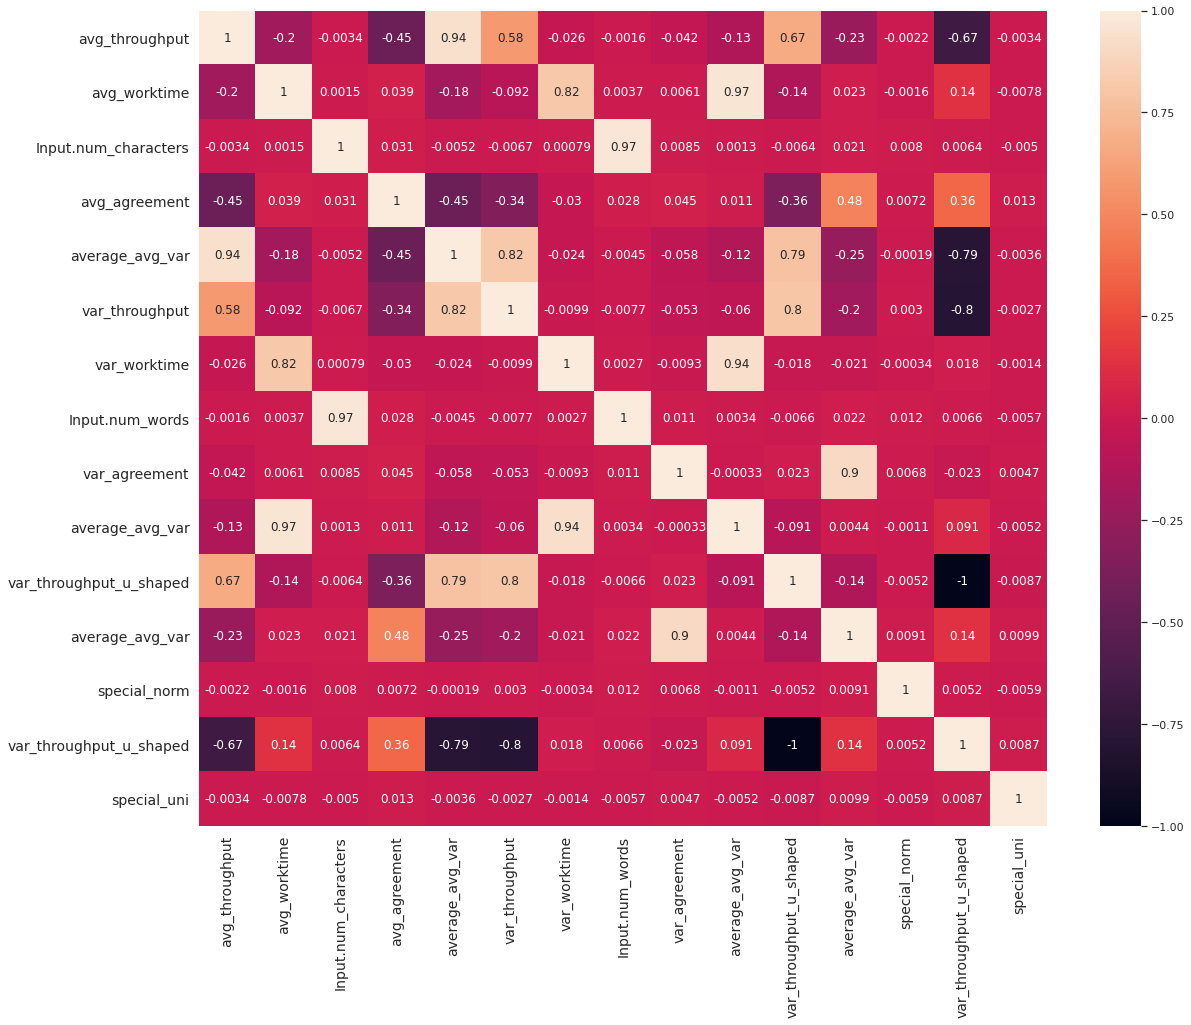

In [14]:
f = plt.figure(figsize=(19, 15))
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
sb.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True)

#### Plot Throughput

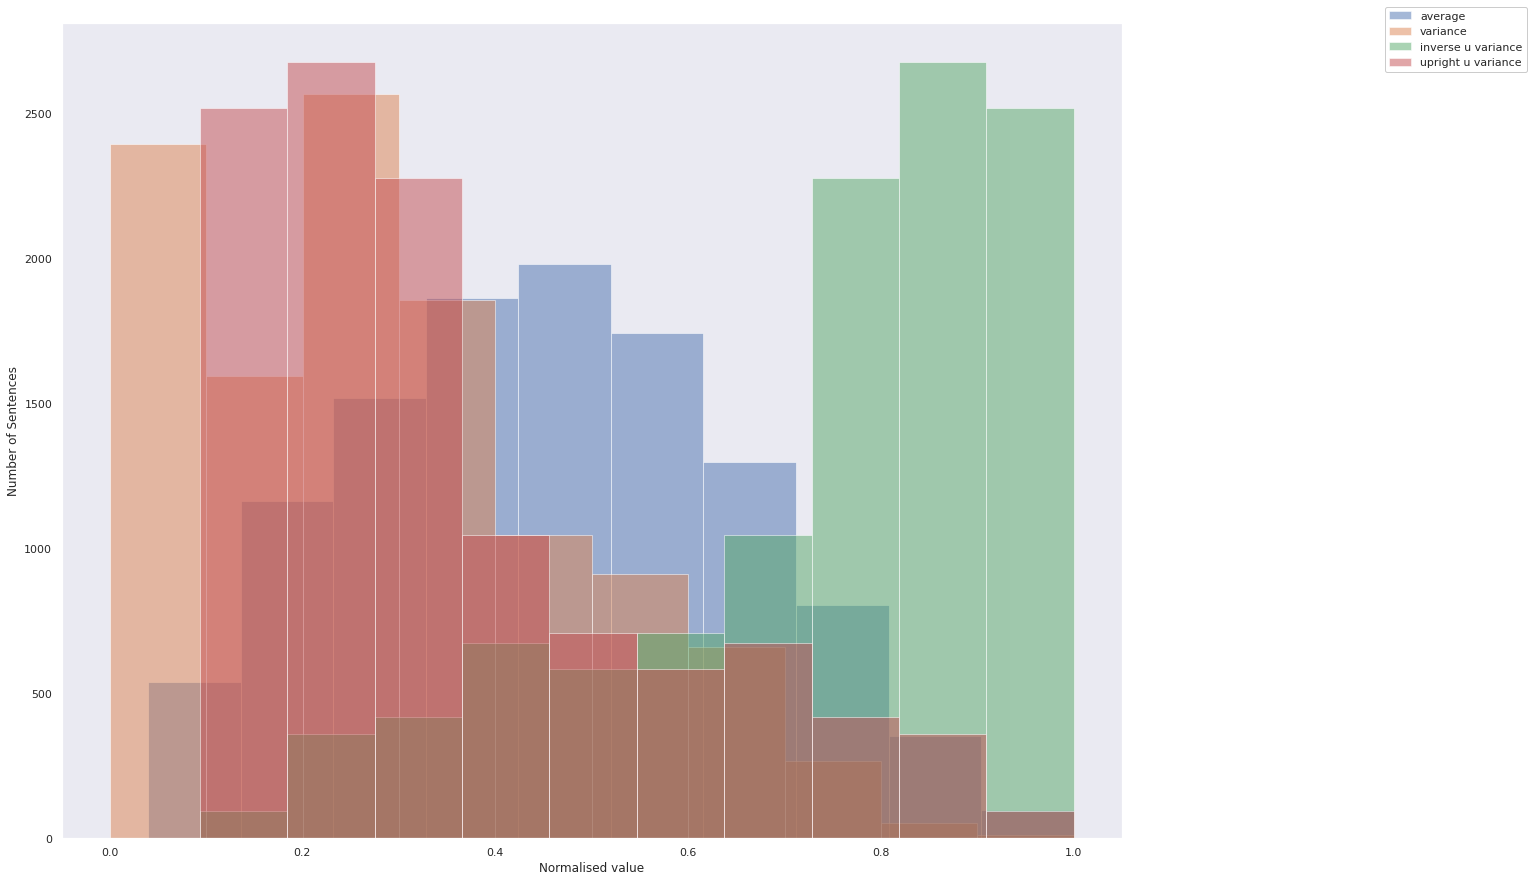

In [15]:
plt.figure(figsize=(19, 15))
df_throughput_avg['avg_throughput'].plot(kind='hist', alpha=0.5, label='average')
df_throughput_var['var_throughput'].plot(kind='hist', alpha=0.5, label='variance')
df_throughput_inv_u['var_throughput_u_shaped'].plot(kind='hist', alpha=0.5, label='inverse u variance')
df_throughput_upright_u['var_throughput_u_shaped'].plot(kind='hist', alpha=0.5, label='upright u variance')
plt.grid(b=None)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.2,0.90), bbox_transform=plt.gcf().transFigure)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))
plt.xlabel('Normalised value')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_overlay_throughput.png', transparent=True, bbox_inches='tight')

#### Plot Worktime

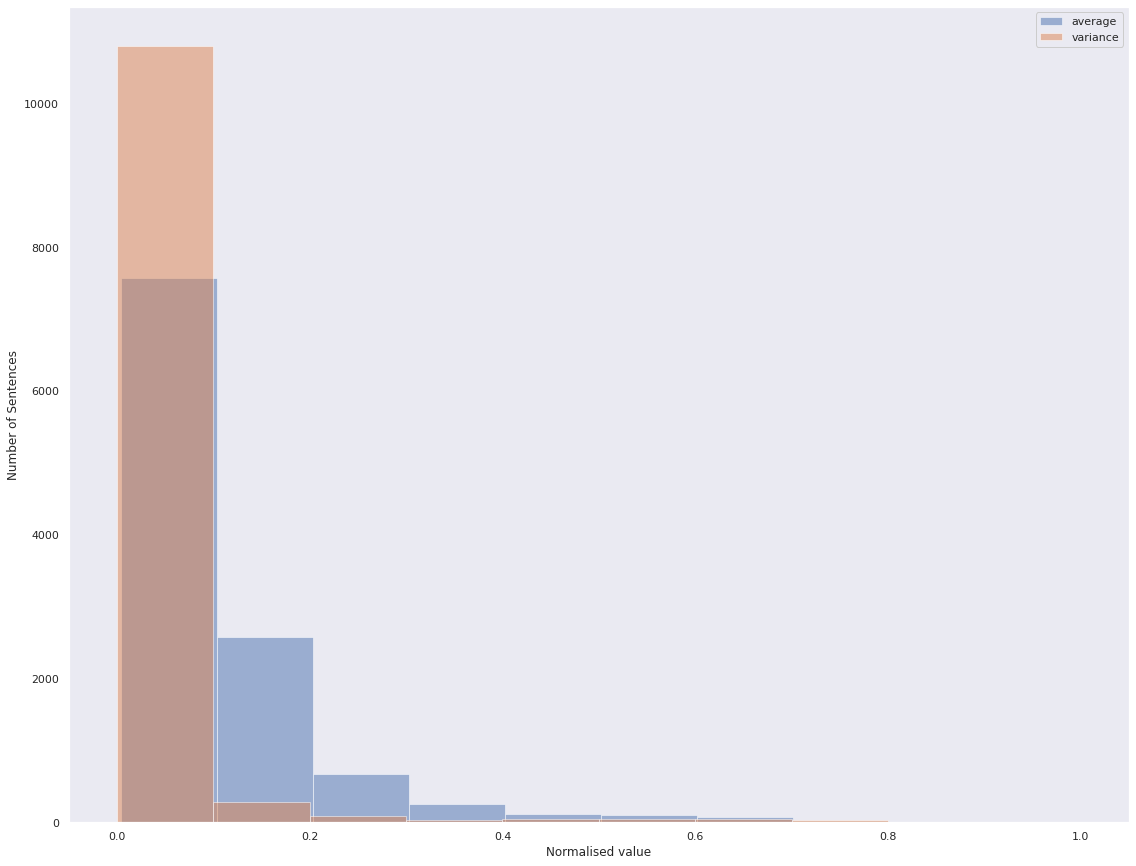

In [16]:
plt.figure(figsize=(19, 15))
df_worktime_avg['avg_worktime'].plot(kind='hist', alpha=0.5, label='average')
df_worktime_var['var_worktime'].plot(kind='hist', alpha=0.5, label='variance')
plt.grid(b=None)
legend = plt.legend(loc='upper right')
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))
plt.xlabel('Normalised value')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_overlay_worktime.png', transparent=True, bbox_inches='tight')

#### Plot PC Agreement

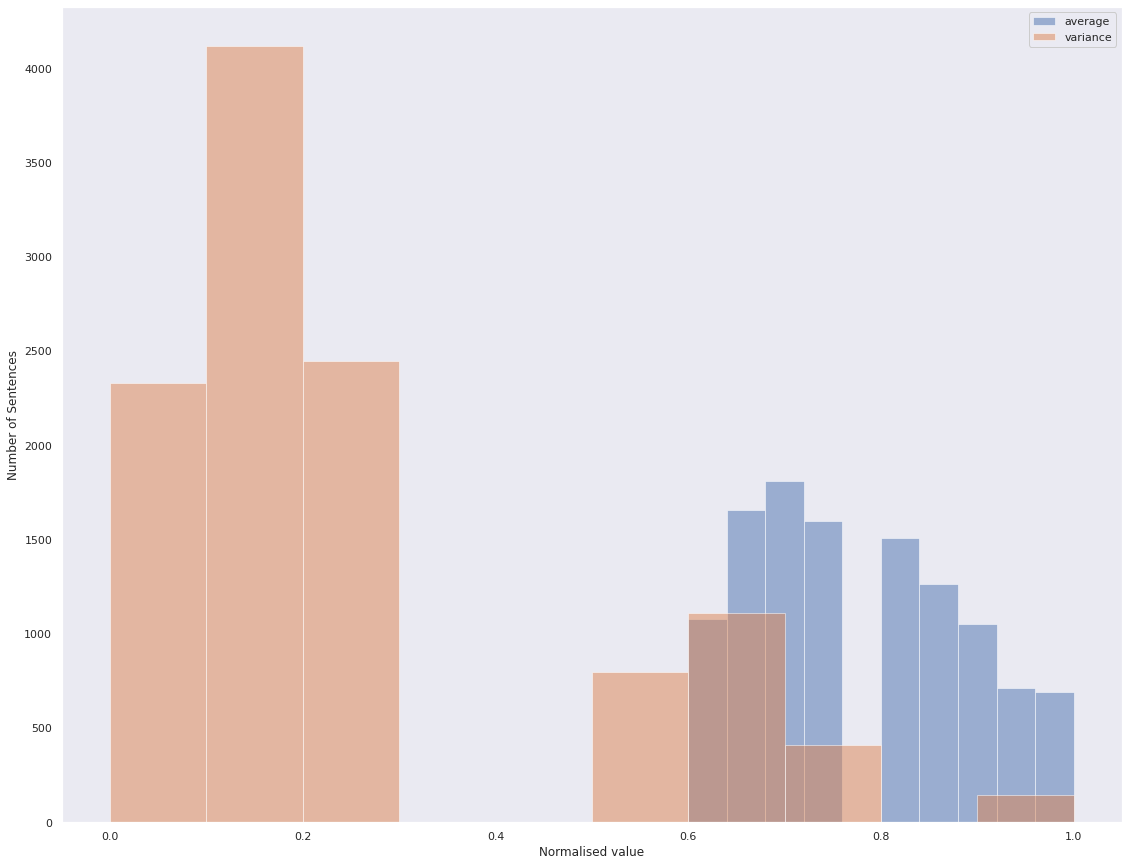

In [17]:
plt.figure(figsize=(19, 15))
df_agreement_avg['avg_agreement'].plot(kind='hist', alpha=0.5, label='average')
df_agreement_var['var_agreement'].plot(kind='hist', alpha=0.5, label='variance')
plt.grid(b=None)
legend = plt.legend(loc='upper right')
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))
plt.xlabel('Normalised value')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_overlay_agreement.png', transparent=True, bbox_inches='tight')

#### Plot Text Length

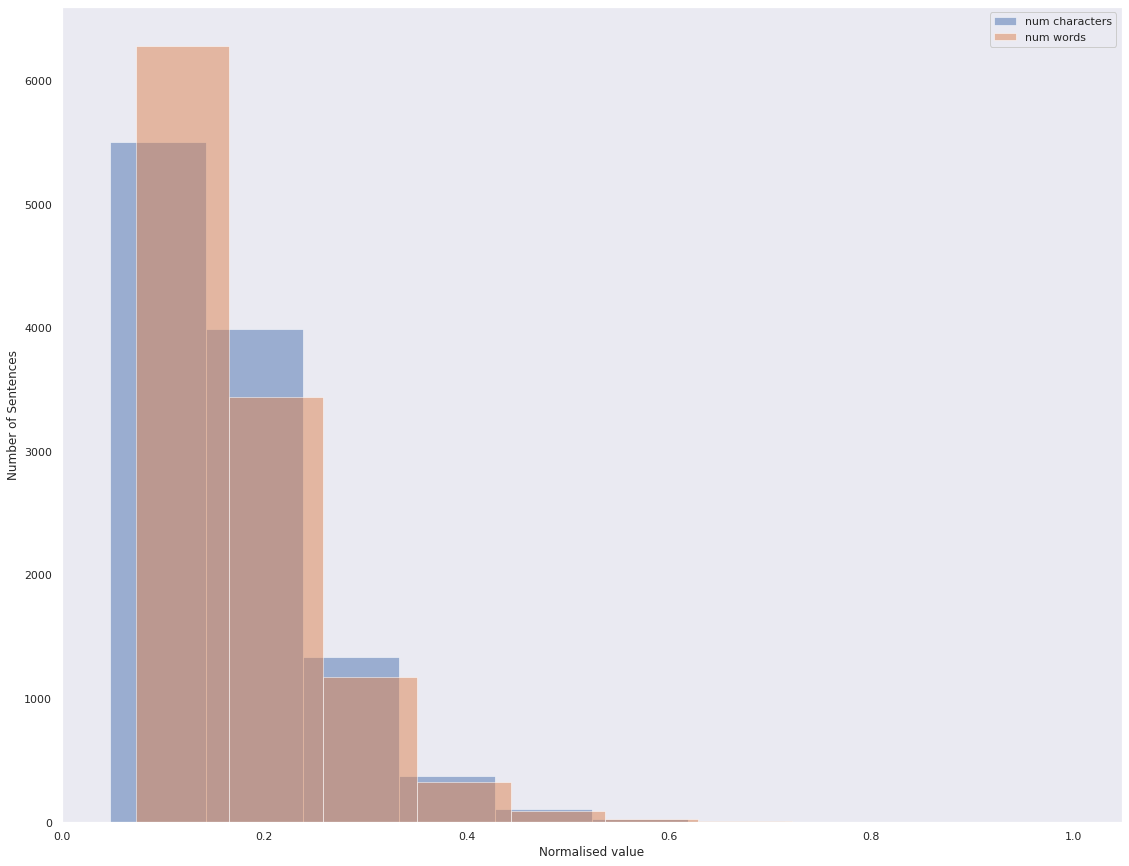

In [18]:
plt.figure(figsize=(19, 15))
df_textlength_avg['Input.num_characters'].plot(kind='hist', alpha=0.5, label='num characters')
df_textlength_var['Input.num_words'].plot(kind='hist', alpha=0.5, label='num words')
plt.grid(b=None)
legend = plt.legend(loc='upper right')
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))
plt.xlabel('Normalised value')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_overlay_textlength.png', transparent=True, bbox_inches='tight')

#### Plot Special

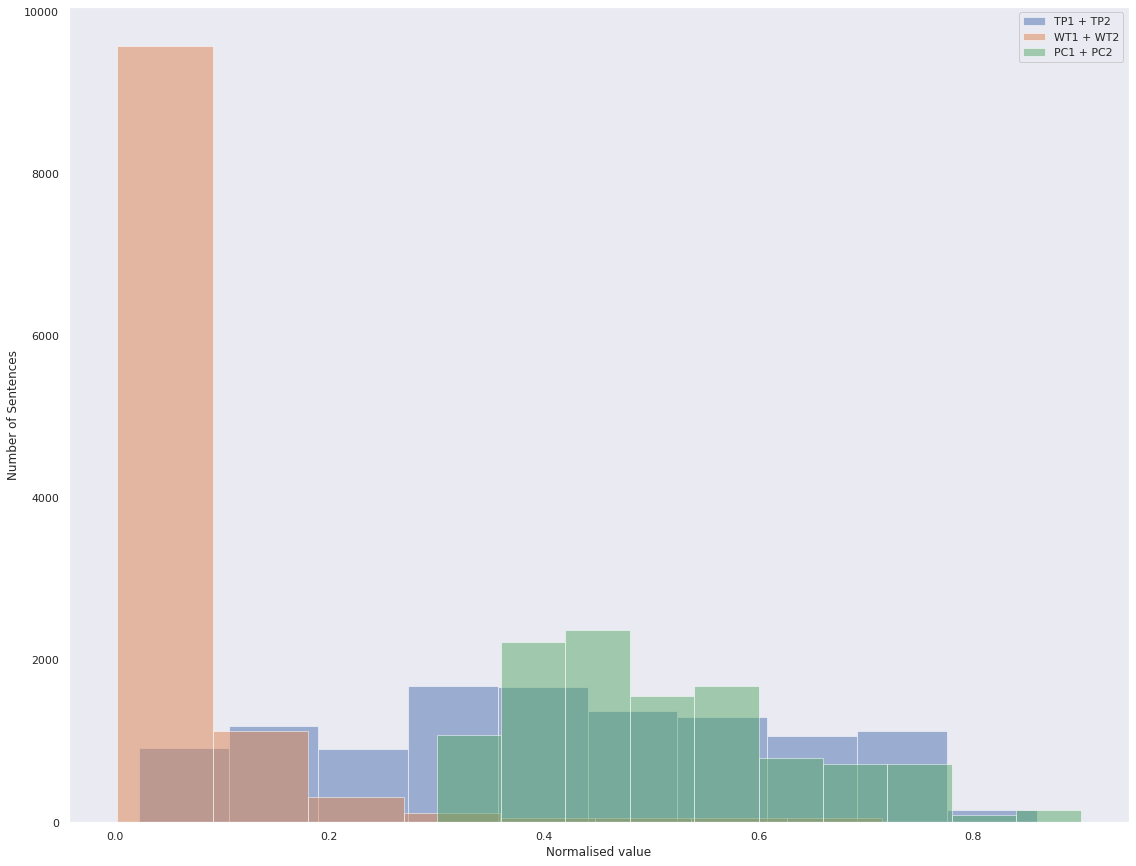

In [19]:
plt.figure(figsize=(19, 15))
df_special_1['average_avg_var'].plot(kind='hist', alpha=0.5, label='TP1 + TP2')
df_special_var['average_avg_var'].plot(kind='hist', alpha=0.5, label='WT1 + WT2')
df_special_4['average_avg_var'].plot(kind='hist', alpha=0.5, label='PC1 + PC2')
plt.grid(b=None)
legend = plt.legend(loc='upper right')
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))
plt.xlabel('Normalised value')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_overlay_special.png', transparent=True, bbox_inches='tight')

In [20]:
def plot_hist(df_array, label):
    weights = np.ones_like(df_array)/float(len(df_array))
    plt.hist(df_array, weights=weights, bins=82, label=label, histtype='step')

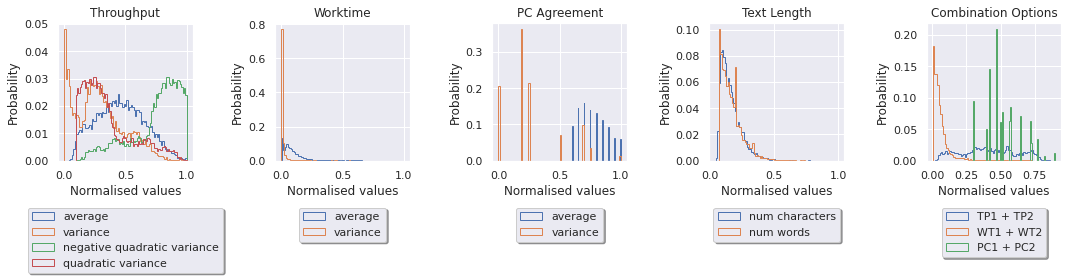

In [40]:
fig = plt.figure(figsize=(15, 4.5))

ax1 = plt.subplot2grid(shape=(1,5), loc=(0,0))
plot_hist(df_throughput_avg['avg_throughput'],'average')
plot_hist(df_throughput_var['var_throughput'],'variance')
plot_hist(df_throughput_inv_u['var_throughput_u_shaped'],'negative quadratic variance')
plot_hist(df_throughput_upright_u['var_throughput_u_shaped'],'quadratic variance')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True)
plt.ylabel('Probability')
plt.xlabel('Normalised values')
plt.title("Throughput")

ax2 = plt.subplot2grid((1,5), (0,1))
plot_hist(df_worktime_avg['avg_worktime'],'average')
plot_hist(df_worktime_var['var_worktime'],'variance')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True)
plt.ylabel('Probability')
plt.xlabel('Normalised values')
plt.title("Worktime")

ax3 = plt.subplot2grid((1,5), (0,2))
plot_hist(df_agreement_avg['avg_agreement'],'average')
plot_hist(df_agreement_var['var_agreement'],'variance')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True)
plt.ylabel('Probability')
plt.xlabel('Normalised values')
plt.title("PC Agreement")

ax4 = plt.subplot2grid((1,5), (0,3))
plot_hist(df_textlength_avg['Input.num_characters'],'num characters')
plot_hist(df_textlength_var['Input.num_words'],'num words')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True)
plt.ylabel('Probability')
plt.xlabel('Normalised values')
plt.title("Text Length")

ax5 = plt.subplot2grid((1,5), (0,4))
plot_hist(df_special_1['average_avg_var'],'TP1 + TP2')
plot_hist(df_special_var['average_avg_var'],'WT1 + WT2')
plot_hist(df_special_4['average_avg_var'],'PC1 + PC2')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True)
plt.ylabel('Probability')
plt.xlabel('Normalised values')
plt.title("Combination Options")

plt.tight_layout()
plt.savefig('./output/main_overlay_all_new.png', transparent=True, bbox_inches='tight')

In [22]:
len(df)

11366